In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import GenericUnivariateSelect, chi2
import os
from typing import Tuple
os.getcwd()

'c:\\pix\\ml\\mlproject_diabetes\\code'

In [29]:
df_diab_012: pd.DataFrame = pd.read_csv("..\data\diabetes_012_health_indicators_BRFSS2015.csv")
df_diab_5050: pd.DataFrame = pd.read_csv("..\data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_diab_binary: pd.DataFrame = pd.read_csv("..\data\diabetes_binary_health_indicators_BRFSS2015.csv")
df_diab_binary.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [22]:
df_diab_012["Diabetes_012"].groupby(by=lambda idx:df_diab_012["Diabetes_012"][idx]).count()

0.0    213703
1.0      4631
2.0     35346
Name: Diabetes_012, dtype: int64

<BarContainer object of 2 artists>

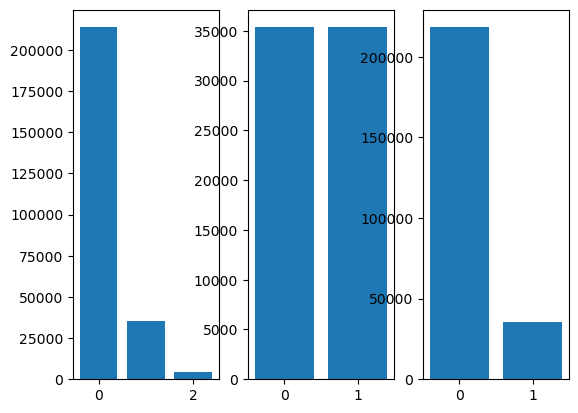

In [ ]:
#relative distribution of the different classes
fig,ax = plt.subplots(1,3)
ax[0].bar(x=df_diab_012["Diabetes_012"].unique(),height = df_diab_012["Diabetes_012"].groupby(by=lambda idx:df_diab_012["Diabetes_012"][idx]).count().values)
ax[1].bar(x=df_diab_5050["Diabetes_binary"].unique(),height = df_diab_5050["Diabetes_binary"].groupby(by=lambda idx:df_diab_5050["Diabetes_binary"][idx]).count().values)
ax[2].bar(x=df_diab_binary["Diabetes_binary"].unique(),height = df_diab_binary["Diabetes_binary"].groupby(by=lambda idx:df_diab_binary["Diabetes_binary"][idx]).count().values)

In [31]:
p_value = 0.05
selector = GenericUnivariateSelect(score_func=chi2,mode='fpr',param=p_value).fit(df_diab_012.drop("Diabetes_012",axis=1),df_diab_012["Diabetes_012"])
diab_012_features_selected = selector.get_feature_names_out()
selector = GenericUnivariateSelect(score_func=chi2,mode='fpr',param=p_value).fit(df_diab_5050.drop("Diabetes_binary",axis=1),df_diab_5050["Diabetes_binary"])
diab_5050_features_selected = selector.get_feature_names_out()
selector = GenericUnivariateSelect(score_func=chi2,mode='fpr',param=p_value).fit(df_diab_binary.drop("Diabetes_binary",axis=1),df_diab_binary["Diabetes_binary"])
diab_binary_features_selected = selector.get_feature_names_out()
